In [269]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix,precision_score,recall_score,f1_score
from sklearn.preprocessing import StandardScaler

In [270]:
Loan_p=pd.read_csv('Data.csv')
Loan_p

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [271]:
No_of_dup=Loan_p['Loan_ID'].duplicated().sum()
No_of_dup


0

In [272]:
Loan_p.describe()


,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [273]:
df1=pd.DataFrame(Loan_p)
df1

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [274]:
df1

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [275]:
df1.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [276]:
Mode_val=df1['Gender'].mode().iloc[0]
df1['Gender'].fillna(Mode_val,inplace=True)
Mode_val=df1['Married'].mode().iloc[0]
df1['Married'].fillna(Mode_val,inplace=True)
Mode_val=df1['Dependents'].mode().iloc[0]
df1['Dependents'].fillna(Mode_val,inplace=True)
Mode_val=df1['Self_Employed'].mode().iloc[0]
df1['Self_Employed'].fillna(Mode_val,inplace=True)
Mode_val=df1['Loan_Amount_Term'].mode().iloc[0]
df1['Loan_Amount_Term'].fillna(Mode_val,inplace=True)
Mode_val=df1['Credit_History'].mode().iloc[0]
df1['Credit_History'].fillna(Mode_val,inplace=True)

In [277]:
df1.isnull().sum()

Loan_ID               0
Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term      0
Credit_History        0
Property_Area         0
Loan_Status           0
dtype: int64

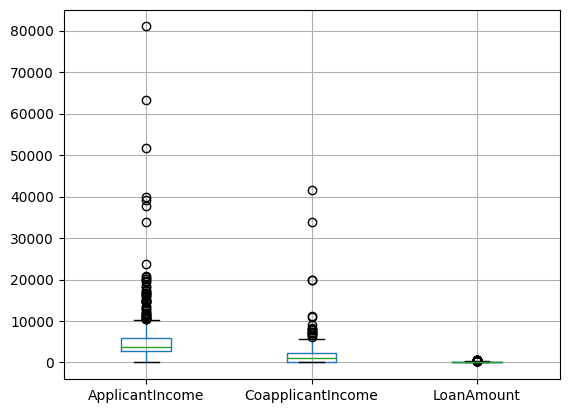

In [278]:
df1.boxplot(column=['ApplicantIncome','CoapplicantIncome','LoanAmount'])
plt.show()


In [279]:
from scipy.stats import trim_mean


In [280]:
col=df1['ApplicantIncome']
Q1=col.quantile(0.25)
Q3=col.quantile(0.75)
IQR=Q3-Q1
lower_bound=Q1-1.5*IQR
upper_bound=Q3+1.5*IQR
Outliers=(col<lower_bound)|(col>upper_bound)

col_c=df1['CoapplicantIncome']
Q1_c=col_c.quantile(0.25)
Q3_c=col_c.quantile(0.75)
IQR_c=Q3_c-Q1_c
lower_bound_c=Q1_c-1.5*IQR_c
upper_bound_c=Q3_c+1.5*IQR_c
Outliers_c=(col_c<lower_bound_c)|(col_c>upper_bound_c)

col_l=df1['LoanAmount']
Q1_l=col_l.quantile(0.25)
Q3_l=col_l.quantile(0.75)
IQR_l=Q3_l-Q1_l
lower_bound_l=Q1_l-1.5*IQR_l
upper_bound_l=Q3_l+1.5*IQR_l
Outliers_l=(col_l<lower_bound_l)|(col_l>upper_bound_l)



In [281]:
trim_perc=sum(Outliers)/len(col)
trim_perc
trim_perc_c=sum(Outliers_c)/len(col_c)
trim_perc_c
trim_perc_l=sum(Outliers_l)/len(col_l)
trim_perc_l
trim_mean_result=trim_mean(df1['ApplicantIncome'],proportiontocut=trim_perc)
trim_mean_result
trim_mean_result_c=trim_mean(df1['CoapplicantIncome'],proportiontocut=trim_perc_c)
trim_mean_result_l=trim_mean(df1['LoanAmount'],proportiontocut=trim_perc_l)
df1['ApplicantIncome']=np.where(Outliers,trim_mean_result,col)
df1['CoapplicantIncome']=np.where(Outliers_c,trim_mean_result_c,col_c)
df1['LoanAmount']=np.where(Outliers_l,trim_mean_result_l,col_l)


In [282]:
trim_mean_result_l=trim_mean(df1['LoanAmount'],proportiontocut=trim_perc_l)
df1['LoanAmount'].fillna(trim_mean_result_l,inplace=True)

In [283]:
df1.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

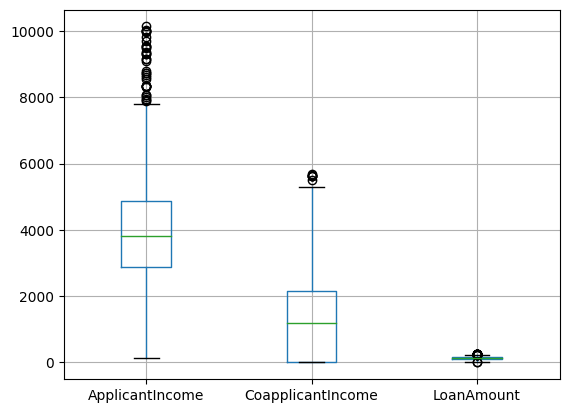

In [284]:
df1.boxplot(column=['ApplicantIncome','CoapplicantIncome','LoanAmount'])
plt.show()

In [285]:
df1.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome      float64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [286]:
df1.to_csv(r'C:\Users\sajee\Desktop\Practice\df1.csv',index=False)

In [294]:
c_e=['Loan_ID','Gender','Married','Dependents','Education','Self_Employed','Property_Area']
df1 = pd.get_dummies(df1, columns=c_e)

In [295]:
X=df1.drop(['Loan_Status'],axis=1)
y=df1['Loan_Status']


In [296]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [297]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((491, 634), (123, 634), (491,), (123,))

In [298]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Columns: 635 entries, ApplicantIncome to Property_Area_Urban
dtypes: bool(629), float64(5), object(1)
memory usage: 406.1+ KB


In [299]:
scaler=StandardScaler()

In [300]:
train_sc=scaler.fit_transform(X_train)

In [301]:
X_test_sc=scaler.transform(X_test)

In [302]:
lr=LogisticRegression()

In [303]:
lr.fit(train_sc,y_train)

LogisticRegression()

In [304]:
y_pred=lr.predict(X_test_sc)

In [305]:
y_pred

array(['Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'N', 'N', 'Y', 'Y',
       'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'N', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N',
       'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'N', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'N', 'Y', 'N', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y'], dtype=object)

In [306]:
y_test

350    Y
377    Y
163    Y
609    Y
132    Y
      ..
231    Y
312    Y
248    Y
11     Y
333    Y
Name: Loan_Status, Length: 123, dtype: object

In [310]:
accuracy_score(y_test,y_pred)

0.7723577235772358

In [312]:
cfm=confusion_matrix(y_test,y_pred)
print(cfm)

[[15 28]
 [ 0 80]]
